# Evaluation

In this exersice you will train several models and evaluate how effectively they predict instances of breast cancer.
 
The breast cancer dataset is a classic and very easy binary classification dataset.

Attribute Information:
ID number 2) Diagnosis (M = malignant, B = benign) 3–32)
Ten real-valued features are computed for each cell nucleus:
radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness (local variation in radius lengths)
compactness (perimeter² / area — 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symmetry
fractal dimension (“coastline approximation” — 1)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's First import the data from `data.csv`.


In [30]:
#importing our cancer dataset
dataset = pd.read_csv('data/data.csv')
X = dataset.iloc[:, 2:31].values
Y = dataset.iloc[:, 1].values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


***QUESTION*** Split your data to train and test, use random_state=0

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.30,random_state=1000)

***QUESTION*** Scale your features with StandardScaler

In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***QUESTION*** 

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?



In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score
dumyclf=DummyClassifier()
dumyclf.fit(X_train,y_train)
predicted=dumyclf.predict(X_test)
accuracy=accuracy_score(predicted,y_test)
recall=recall_score(predicted,y_test)
########## YOUR CODE HERE ###########

print(accuracy)
print(recall)

0.5029239766081871
0.359375


***QUESTION*** print full classifcation report

In [34]:
from sklearn.metrics import classification_report

########## YOUR CODE HERE ###########
print(classification_report(predicted,y_test))


              precision    recall  f1-score   support

           0       0.61      0.59      0.60       107
           1       0.34      0.36      0.35        64

    accuracy                           0.50       171
   macro avg       0.47      0.47      0.47       171
weighted avg       0.51      0.50      0.51       171



***QUESTION*** why is it bad..

### write your answer here in arabic

***QUESTION*** 

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?


In [35]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)
predicted=clf.predict(X_test)
accuracy=accuracy_score(predicted,y_test)
recall=recall_score(predicted,y_test)
precision=precision_score(predicted,y_test)

########## YOUR CODE HERE ###########

print(accuracy)
print(recall)
print(precision)

0.9707602339181286
0.9558823529411765
0.9701492537313433


***QUESTION*** is it bad or good? why do you think that

### write your answer here in arabic

***QUESTION***

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`,
    1- use the threshold of -220 to predict the output of X_test on the ``decision_function`` (use simpley (> -220) to do that) 
    1- what is the accuracy?
    2- print the confusion matrix when using a this threshold, Use X_test and y_test
    This should return a confusion matrix, a 2x2 numpy array with 4 integers.*

0.7894736842105263
[[68  0]
 [36 67]]


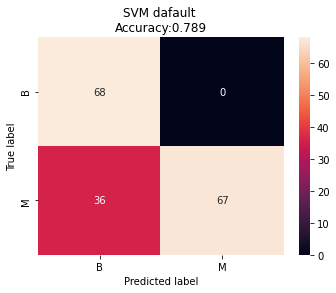

In [86]:
from sklearn.metrics import confusion_matrix
clf=SVC(C=1e9,gamma=1e-07)
clf.fit(X_train,y_train)
predicted=clf.decision_function(X_test)>-220
accuracy=accuracy_score(predicted,y_test)
confusion=confusion_matrix(predicted,y_test)
########## YOUR CODE HERE ###########


print(accuracy)
print(confusion)

df_cm = pd.DataFrame(confusion, index = ['B', 'M'],
                  columns = ['B', 'M'])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM dafault \nAccuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label');

***QUESTION*** 

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is B).

- What is the area under roc?
- what do you think of this classifier

EXTRA: 
- Looking at the precision recall curve, what is the recall when the precision is `0.75`?
- Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?




C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


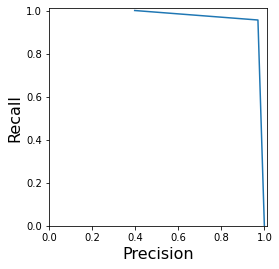

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
clf=LogisticRegression()
clf.fit(X_train,y_train)
predicted=clf.predict(X_test)

########## YOUR CODE HERE ###########     
precision= precision_recall_curve (predicted,y_test)[0]
recall = precision_recall_curve(predicted,y_test)[1]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
    

    
# fpr_lr = ? 
# tpr_lr = ?
# roc_auc_lr = ?



# print(roc_auc_lr)


# plt.figure()
# plt.xlim([-0.01, 1.00])
# plt.ylim([-0.01, 1.01])
# plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
# plt.xlabel('False Positive Rate', fontsize=16)
# plt.ylabel('True Positive Rate', fontsize=16)
# plt.title('ROC curve ', fontsize=16)
# plt.legend(loc='lower right', fontsize=13)
# plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
# plt.axes().set_aspect('equal')
# plt.show()

In [ ]:
roc_curve

write your answers here

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

- what are the best parameters
- predict useing the best model and print the confustion matrix

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100],
              }
model=LogisticRegression()
# Your code here
grid = GridSearchCV(model, param_grid, cv=7)

In [55]:
grid.fit(X_train, y_train)

C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [57]:
predicted=grid.best_estimator_.predict(X_test)

In [58]:
accuracy_score(predicted,y_test)

0.9532163742690059

In [62]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.96      0.93      0.94        69

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



<function sklearn.metrics.classification.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)>